# Exercitiul 1<br>
### Simularea datelor
Generam aleator valori de intrare si le scriem in fisier.

In [12]:
import random

from IPython.testing.tools import printed_msg


def prepare_input(sample_space, sample_size):
    with open('input.csv', 'w', newline='') as f:
        data = random.sample(range(sample_space), sample_size)
        f.write(str(data[0]))
        for i in range(len(data) - 1):
            f.write(',' + str(data[i + 1]))
    f.close()
prepare_input(100, 20)

### Extragerea submultimii din setul de date
Citim datele din fisier si extragem aleator o submultime din sample.<br>Inainte de extragerea submultimii, convertim lista intr-un set pentru a pastra unicitatea elementelor alese si avem grija ca numarul de elemente din submultime sa nu depaseasca dimensiunea sample-ului. 

In [13]:
import csv

k = 4
with open('input.csv', newline='') as f:
  reader = csv.reader(f)
  data = []
  for row in reader:
      data += row
f.close()
random.sample(list(set(data)), min(k, len(data))) #sampling from set is deprecated

['95', '73', '42', '98']

# Exercitiul 2<br>

### <b>a.</b> 
N urmeaza distributia binomiala, deoarece numara succesele consecutive ale unui experiment (aruncatul monedei).<br>
<br>
### <b>b.</b> 
### Simularea jocului descris in enunt<br>
Functia <i>play_game</i> primeste ca parametrii valorile pe care le poate lua moneda (0 pentru cap si 1 pentru pajura), probabilitatile cu care pica fiecare dintre fetele monezii si valorile de pe fetele zarului. Deoarece zarul nu poate fi masluit, nu am inclus probabilitatile fiecarei fete.

In [14]:
import numpy as np

def play_game(coin, p_coin, die):
    coin_flip = 0
    n = 0
    s = 0
    while coin_flip == 0:
        n += 1
        coin_flip = np.random.choice(coin, 1, p=p_coin)[0] #choice returns a vector of size 1
        if coin_flip == 0:
            s -= 0.5
        else:
            die_roll = np.random.choice(die, 1)[0]
            s = s + die_roll - 3
    return n, s

play_game([0, 1], [0.5, 0.5], [1, 2, 3, 4, 5, 6])

(2, np.float64(-0.5))

### <b>c.</b>
Simuland un numar mai mare de astfel de jocuri, putem estima media sumei S de dolari pe care al doilea jucator o datoreaza primului.

In [64]:
def ex2(p_head, nr_games):
    coin = [0, 1]
    p_coin = [p_head, 1 - p_head]
    die = [1, 2, 3, 4, 5, 6]
    s_sample = []
    n_sample = []
    
    while nr_games:
        n, s = play_game(coin, p_coin, die)
        n_sample.append(n)
        s_sample.append(s)
        nr_games -= 1
    return s_sample, n_sample
S, N = ex2(0.5, 100000)

### Vizualizarea datelor.

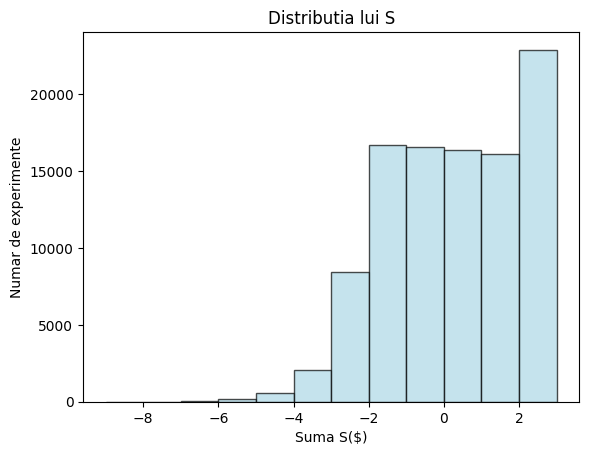

In [44]:
import matplotlib.pyplot as plt

def plot_s(s, title):
    plt.hist(s, bins=int(abs((max(s) - min(s)))), alpha = 0.7, color = 'lightblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Suma S($)')
    plt.ylabel('Numar de experimente')
    plt.show()
plot_s(S, 'Distributia lui S')


### Interpretarea datelor
<br>
Factorii care influenteaza suma S sunt <b>moneda</b> si <b>zarul</b>.<br>
<br>
Atunci cand se da cu <b>zarul</b>, al doilea jucator ii va datora primului in medie $(1 + 2 + 3 + 4 + 5 + 6)/6 - 3 = 21/6 - 3 = 0.5$ dolari.<br>
<br>
Pentru a calcula contributia <b>monedei</b> la suma s trebuie sa luam in considerare numarul de runde in care se termina jocul. Pentru un numar r de runde, moneda va contribui cu $(-0.5) * (r - 1)$ dolari la suma. Pentru fiecare runda in afara de ultima, se scad $0.5$ dolari din datoria pe care o are al doilea jucator fata de primul. Astfel, putem calcula cu cat contribuie in media moneda la s.
\begin{align}
 \text{Contributia monedei} &= \sum_{r=1}^\infty (-0.5)\cdot(r-1)\cdot P_{head}^{(r-1)}\cdot P_{tails} \\
 &= (-0.5)\cdot P_{tails}\cdot\sum_{r=1}^\infty (r-1)\cdot P_{head}^{(r-1)} \\
 &= (-0.5)\cdot P_{tails}\cdot\sum_{r=1}^\infty r\cdot P_{head}^{r} \\
 &= (-0.5)\cdot P_{tails}\cdot\frac{P_{head}}{(1 - P_{head})^2}
 \end{align}
 Pentru $P_{head} =  0.5$ si $P_{tails} = 0.5$, vom avea:
 \begin{align}
 \text{Contributia monedei} &= (-0.5)\cdot 0.5\cdot\frac{0.5}{(1 - 0.5)^2} \\
 &= (-0.5)\cdot 0.5\cdot 2 \\
 &= (-0.5)\cdot 1 = -0.5
 \end{align}
 Asadar, media lui s in cadrul experimentului luand in calcul contributia monedei si contributia zarului va fi: $E[S] = \text{Contributia zarului} + \text{Contributia monedei} = 0.5 - 0.5 = 0$<br>
 <br>
 Media observata in experiment coincide cu media calculata cu o precizie de $10^{(-2)}$. 

### Compararea datelor observate cu cele calculate

In [65]:
print(f'Media observata a lui S: {np.mean(S)}')
print('Media calculata a lui S: 0')

Media observata a lui S: -0.002515
Media calculata a lui S: 0


### <b>d.</b>
Daca moneda este masluita, se va modifica media lui S. Daca probabilitatea sa pice cap este mai mare de 0.5, jocul este mai probabil sa nu se termine, deci media sumei S va scadea. In cazul in care probabilitatea sa pice cap este mai mica de 0.5, media sumei S va creste. Notam cu S2 variabila corespunzatoare experimentului cu $P_{head}=0.7$ si cu S3 pe cea corespunzatoare experimentului cu $P_{head} = 0.3$.<br>
$\text{Contributia monedei in S2} = (-0.5)\cdot 0.3\cdot\frac{0.7}{(1 - 0.7)^2} \approx (-0.5)\cdot 0.3\cdot 7.78 \approx -1.16$<br>
$E[S_2] \approx 0.5 - 1.16 \approx -0.66$


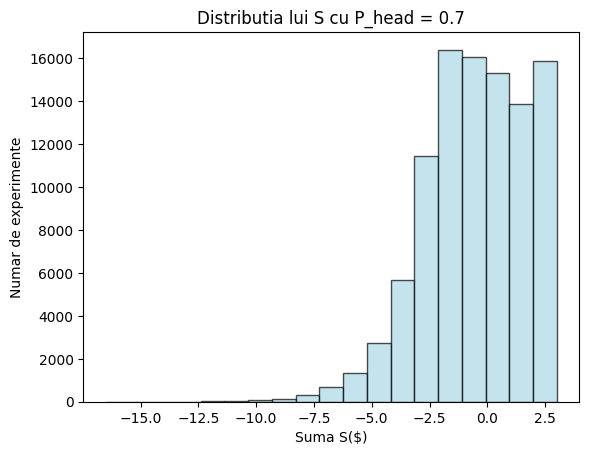

Media observata a lui S2: -0.66993
Media calculata a lui S: 0.6666666666666666


In [66]:
S2, N2 = ex2(0.7, 100000)
print(f'Media observata a lui S2: {np.mean(S2)}')
print(f'Media calculata a lui S2: {2/3}')
plot_s(S2, 'Distributia lui S2 cu P_head = 0.7')

$\text{Contributia monedei in S3} = (-0.5)\cdot 0.7\cdot\frac{0.3}{(1 - 0.3)^2} \approx (-0.5)\cdot 0.7\cdot 0.61 \approx -0.214$<br>
$E[S_3] \approx 0.5 - 0.214 \approx 0.286$


Media observata a lui S3: 0.28326
Media calculata a lui S3: 0.2857142857142857


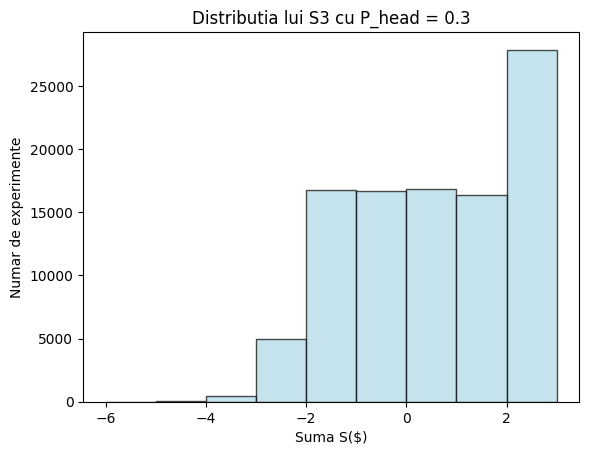

In [67]:
S3, N3 = ex2(0.3, 100000)
print(f'Media observata a lui S3: {np.mean(S3)}')
print(f'Media calculata a lui S3: {2/7}')
plot_s(S3, 'Distributia lui S3 cu P_head = 0.3')

# Exercitiul 3
<br>
Probabilitatile de preluare ale frizerilor sunt $P_1 = \frac{3}{13}, P_2 = \frac{6}{13}, P_3 = \frac{4}{13}$ deoarece rata lor de servire este de $3, 6$ respectiv $4$ clienti pe ora. Sa consideram ca in frizerie se afla un numar foarte mare de clienti. Intr-o ora vor putea fi serviti doar $13$ dintre ei: $3$ vor merge la primul frizer, $6$ la al doilea si $4$ la al treilea.<br>
<br>
Pentru a calcula timpul de servire pentru un client, trebuie sa calculam rata cu care acesta este servit in medie, deoarece clientul nu vine la un singur frizer, ci poate fi servit de oricare dintre ei.
\begin{align}
\lambda_{global} &= \sum_{frizer}\lambda_{frizer}\cdot P_{frizer} \\
&= 3\cdot\frac{3}{13} + 6\cdot\frac{6}{13} + 4\cdot\frac{4}{13} \\
&= \frac{61}{13} \approx 4.69
\end{align}
<br>
Variabila X va urma o distributie exponentiala cu $\lambda = \frac{61}{13}$.

In [68]:
x = [np.random.exponential(scale = 13/61) for i in range(10000)]
print(f'Media observata a lui X: {np.mean(x)}')
print(f'Media calculata a lui X: {13/61}')
print(f'Deviatia standard observata a lui X: {np.std(x)}')
print(f'Deviatia standard observata a lui X: {13/61}')

Media observata a lui X: 0.20878640379209004
Media calculata a lui X: 0.21311475409836064
Deviatia standard observata a lui X: 0.20775890763932306
Deviatia standard observata a lui X: 0.21311475409836064


### Vizualizarea lui X

<Axes: ylabel='Density'>

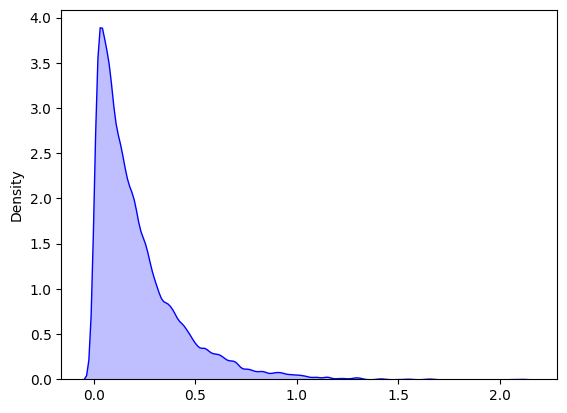

In [63]:
#nu am putut folosi arviz deoarece nu este compatibil cu cea mai noua versiune de numpy..
import seaborn as sns

sns.kdeplot(x, fill=True, color='blue', bw_adjust=0.5)